# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [8]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [9]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city. unit is metric(Centigrade)
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kawambwa
Processing Record 2 of Set 1 | saint-philippe
Processing Record 3 of Set 1 | olonkinbyen
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | pont rouge
Processing Record 6 of Set 1 | qaqortoq
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | vernon
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | codrington
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | dunedin
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | grytviken
Processing Record 15 of Set 1 | laguna
Processing Record 16 of Set 1 | adamstown
Processing Record 17 of Set 1 | at taj
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | amursk
Processing Record 20 of Set 1 | ust-nera
Processing Record 21 of Set 1 | mil'kovo
Processing Record 22 of Set 1 | georgetown
Pro

Processing Record 40 of Set 4 | tavira
Processing Record 41 of Set 4 | guajara mirim
Processing Record 42 of Set 4 | totness
Processing Record 43 of Set 4 | santa marta
Processing Record 44 of Set 4 | dwarka
Processing Record 45 of Set 4 | middelburg
Processing Record 46 of Set 4 | mugia
Processing Record 47 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 48 of Set 4 | micheweni
Processing Record 49 of Set 4 | zheleznogorsk-ilimskiy
Processing Record 0 of Set 5 | suhbaatar
Processing Record 1 of Set 5 | klyuchi
Processing Record 2 of Set 5 | huarmey
Processing Record 3 of Set 5 | el bauga
Processing Record 4 of Set 5 | kitui
Processing Record 5 of Set 5 | ghadamis
Processing Record 6 of Set 5 | la passe
Processing Record 7 of Set 5 | invercargill
Processing Record 8 of Set 5 | zhangjiakou
Processing Record 9 of Set 5 | playa del ingles
Processing Record 10 of Set 5 | fernie
Processing Record 11 of Set 5 | villa gesell
Processing Record 12 of Set 5 | sint michiel libe

Processing Record 31 of Set 8 | matadi
Processing Record 32 of Set 8 | portland
Processing Record 33 of Set 8 | chaparral
Processing Record 34 of Set 8 | pangoa
Processing Record 35 of Set 8 | prince rupert
Processing Record 36 of Set 8 | tual
Processing Record 37 of Set 8 | oneonta
Processing Record 38 of Set 8 | igrim
Processing Record 39 of Set 8 | marsassoum
Processing Record 40 of Set 8 | mlowo
Processing Record 41 of Set 8 | byron bay
Processing Record 42 of Set 8 | alto piquiri
Processing Record 43 of Set 8 | razdol'noye
Processing Record 44 of Set 8 | tadmur
Processing Record 45 of Set 8 | gazi
Processing Record 46 of Set 8 | san jose village
City not found. Skipping...
Processing Record 47 of Set 8 | serhetabat
Processing Record 48 of Set 8 | broome
Processing Record 49 of Set 8 | sanctuary point
Processing Record 0 of Set 9 | myitkyina
Processing Record 1 of Set 9 | lucapa
Processing Record 2 of Set 9 | puerto quijarro
Processing Record 3 of Set 9 | fandriana
Processing Recor

Processing Record 19 of Set 12 | keetmanshoop
Processing Record 20 of Set 12 | kailua-kona
Processing Record 21 of Set 12 | sebezh
Processing Record 22 of Set 12 | los frentones
Processing Record 23 of Set 12 | temiskaming shores
Processing Record 24 of Set 12 | canillo
Processing Record 25 of Set 12 | bamboo flat
Processing Record 26 of Set 12 | okeechobee
Processing Record 27 of Set 12 | viedma
Processing Record 28 of Set 12 | puerto lempira
Processing Record 29 of Set 12 | crieff
Processing Record 30 of Set 12 | malya
Processing Record 31 of Set 12 | baruun-urt
Processing Record 32 of Set 12 | aswan
Processing Record 33 of Set 12 | bandarbeyla
Processing Record 34 of Set 12 | mariinsk
Processing Record 35 of Set 12 | wotho
Processing Record 36 of Set 12 | tarnogskiy gorodok
Processing Record 37 of Set 12 | cova figueira
Processing Record 38 of Set 12 | bac lieu
Processing Record 39 of Set 12 | richards bay
Processing Record 40 of Set 12 | filadelfia
Processing Record 41 of Set 12 | 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kawambwa,-9.7915,29.0791,11.83,44,26,2.21,ZM,1687140045
1,saint-philippe,-21.3585,55.7679,19.77,80,26,4.37,RE,1687140045
2,olonkinbyen,70.9221,-8.7187,3.40,99,100,2.63,SJ,1687140046
3,alofi,-19.0595,-169.9187,25.94,83,10,4.63,NU,1687140046
4,pont rouge,48.8833,-72.0825,14.16,82,100,2.57,CA,1687140046


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kawambwa,-9.7915,29.0791,11.83,44,26,2.21,ZM,1687140045
1,saint-philippe,-21.3585,55.7679,19.77,80,26,4.37,RE,1687140045
2,olonkinbyen,70.9221,-8.7187,3.40,99,100,2.63,SJ,1687140046
3,alofi,-19.0595,-169.9187,25.94,83,10,4.63,NU,1687140046
4,pont rouge,48.8833,-72.0825,14.16,82,100,2.57,CA,1687140046


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

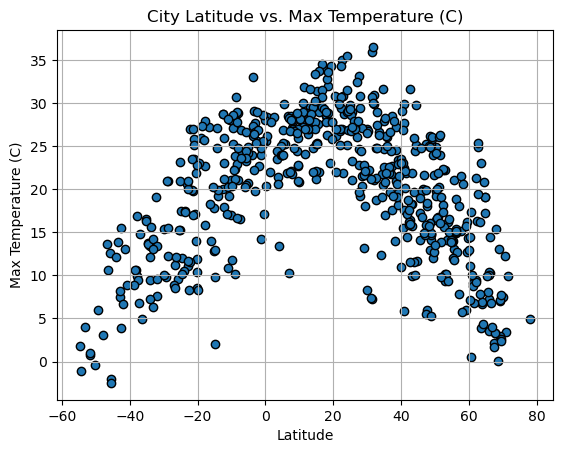

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolor="black")

# Set title and labels
plt.title("City Latitude vs. Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

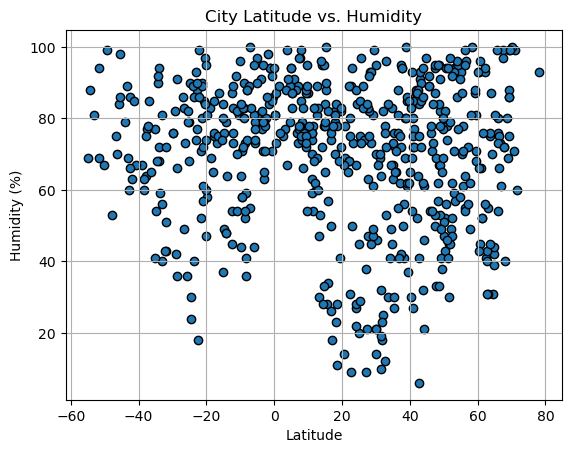

In [16]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

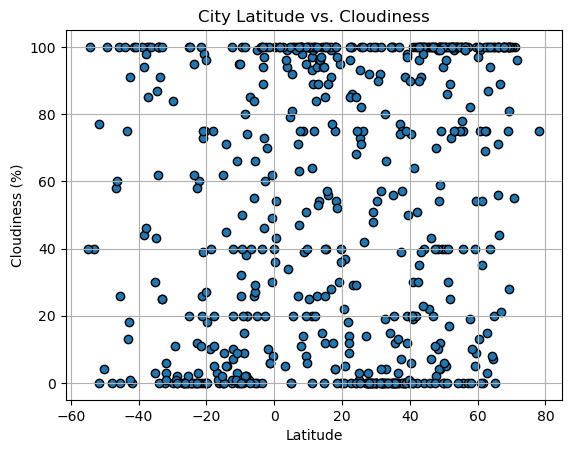

In [17]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

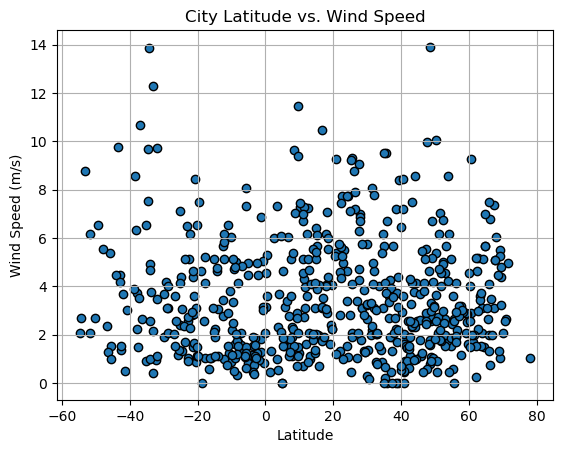

In [18]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [22]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, text_coordinates, x_label, y_label):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, color='red')
    
    # Annotate the line equation
    plt.annotate(line_eq, text_coordinates, color='red', fontsize=15)
    
    # Print the r-squared value
    print(f"The r-value is: {rvalue}")
    
    # Add axis labels
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Display the plot
    plt.show()


In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,olonkinbyen,70.9221,-8.7187,3.40,99,100,2.63,SJ,1687140046
4,pont rouge,48.8833,-72.0825,14.16,82,100,2.57,CA,1687140046
5,qaqortoq,60.7167,-46.0333,0.49,96,99,2.89,GL,1687140046
7,vernon,50.2581,-119.2691,16.45,52,100,5.36,CA,1687139957
8,ribeira grande,38.5167,-28.7000,20.99,80,91,2.24,PT,1687140047


In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kawambwa,-9.7915,29.0791,11.83,44,26,2.21,ZM,1687140045
1,saint-philippe,-21.3585,55.7679,19.77,80,26,4.37,RE,1687140045
3,alofi,-19.0595,-169.9187,25.94,83,10,4.63,NU,1687140046
6,margaret river,-33.9500,115.0667,12.13,68,100,4.92,AU,1687140047
9,codrington,-38.2667,141.9667,10.66,60,44,6.32,AU,1687140008


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7129807064444549


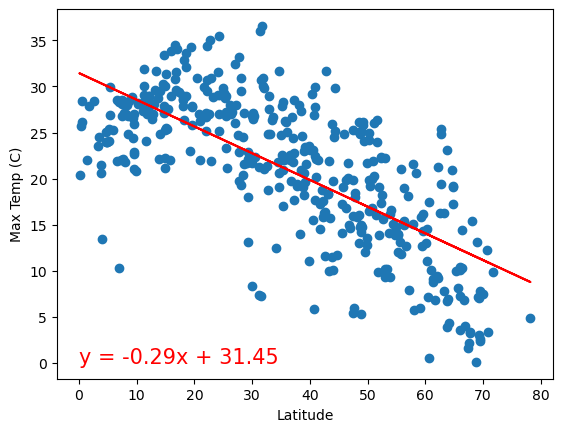

In [25]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Max Temp"], 
                       (0,0), "Latitude", "Max Temp (C)")

The r-value is: 0.7653198727456475


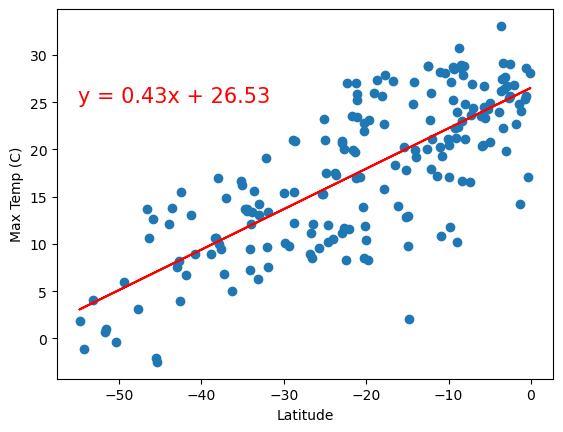

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Max Temp"],
                       (-55,25), "Latitude", "Max Temp (C)")

**Discussion about the linear relationship:** The linear regression analysis on temperature versus latitude in the Northern Hemisphere shows a moderate negative correlation, with temperatures decreasing as latitude increases. In the Southern Hemisphere, there is a moderate positive correlation, indicating that temperatures tend to increase as latitude increases.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.026557263208160844


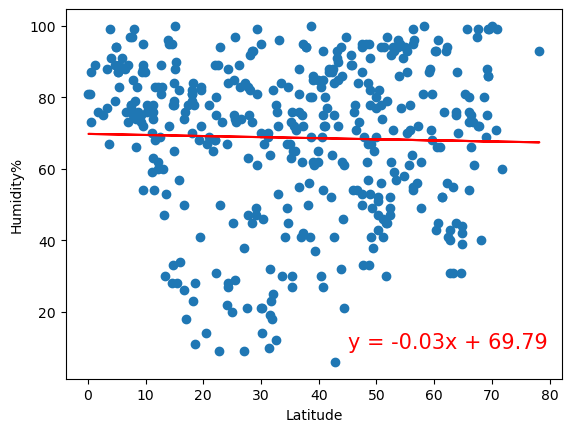

In [38]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], 
                       northern_hemi_df["Humidity"], 
                       (45, 10), "Latitude", "Humidity (%)")

The r-value is: 0.10307948933549854


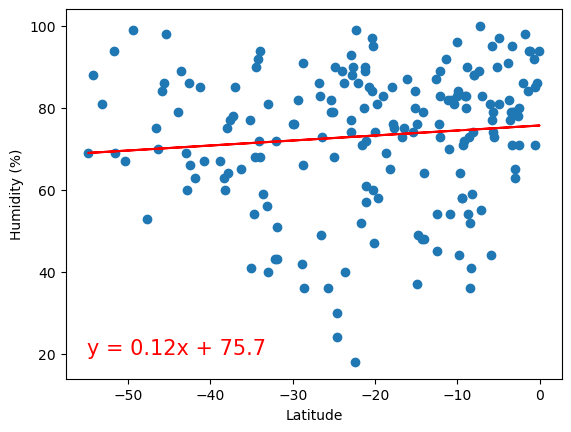

In [40]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], 
                       southern_hemi_df["Humidity"],
                       (-55, 20), "Latitude", "Humidity (%)")


**Discussion about the linear relationship:** The linear regression analysis for humidity versus latitude in both the Northern and Southern Hemispheres reveals weak correlations. In the Northern Hemisphere, latitude shows a weak negative relationship with humidity, while in the Southern Hemisphere, it exhibits a weak positive relationship. These findings suggest that latitude alone is not a strong predictor of humidity, emphasizing the importance of considering other factors such as local climate patterns, proximity to water bodies, elevation, and seasonal variations to understand humidity variations accurately.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.07182757079733618


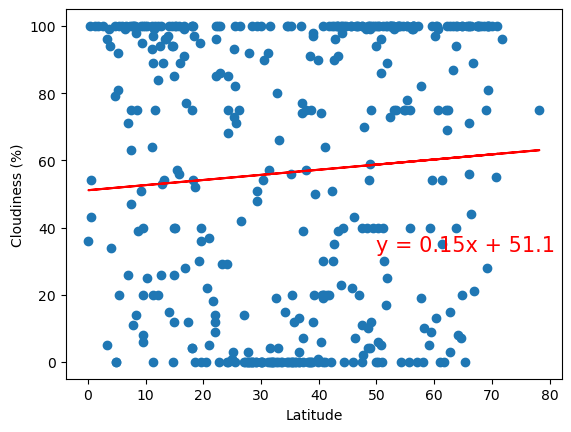

In [45]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Cloudiness"],
                       (50, 33), "Latitude", "Cloudiness (%)")


The r-value is: -0.09851284929757759


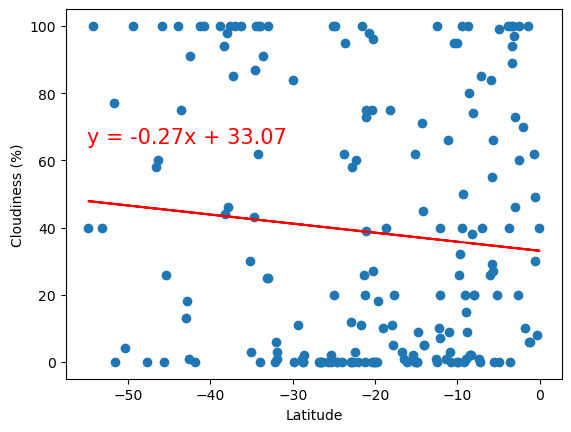

In [50]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Cloudiness"],
                       (-55, 65), "Latitude", "Cloudiness (%)")


**Discussion about the linear relationship:** The linear regression analysis of cloudiness versus latitude in both the Northern and Southern Hemispheres reveals weak correlations. In the Northern Hemisphere, there is a slight positive relationship between latitude and cloudiness, while in the Southern Hemisphere, there is a slight negative relationship. However, the low r-values indicate that latitude has minimal influence on cloudiness. Other factors such as local weather patterns and atmospheric conditions likely play a more significant role in determining cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07209920980263326


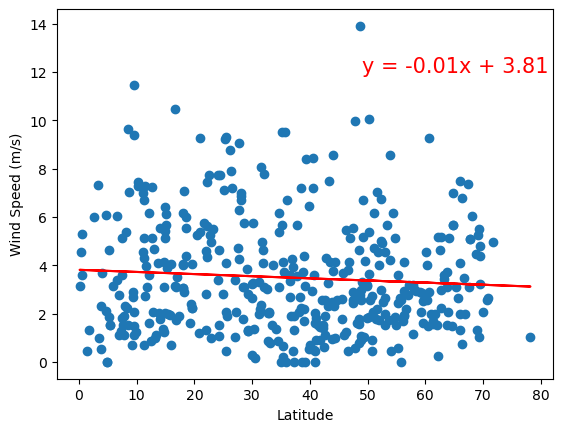

In [59]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"],
                       northern_hemi_df["Wind Speed"], (49, 12),
                       "Latitude", "Wind Speed (m/s)")

The r-value is: -0.25602298757426045


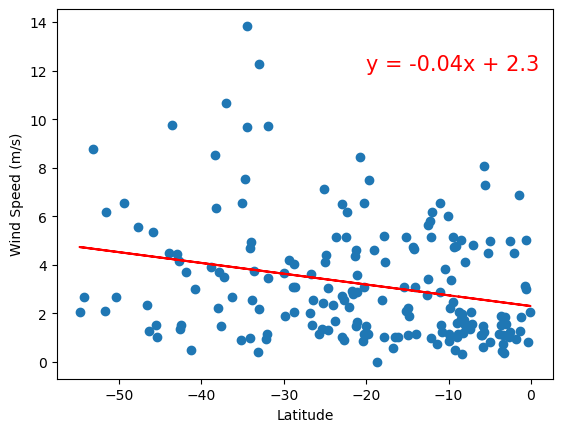

In [75]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"],
                       southern_hemi_df["Wind Speed"], (-20,12),
                       "Latitude", "Wind Speed (m/s)")

**Discussion about the linear relationship:** The linear regression analysis of wind speed and latitude in both the Northern and Southern Hemispheres reveals weak negative correlations. In the Northern Hemisphere, there is a slight decrease in wind speed as latitude increases, but the relationship is not significant. Similarly, in the Southern Hemisphere, as latitude increases, there is a small decrease in wind speed. However, latitude alone is not a strong predictor of wind speed in either hemisphere, suggesting that other factors play a more influential role.